## Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load Dataset

In [2]:
df = pd.read_csv('bank_data.csv')

In [3]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


## Graphical exploratory data analysis: age vs. expected recovery amount

Text(0, 0.5, 'Age')

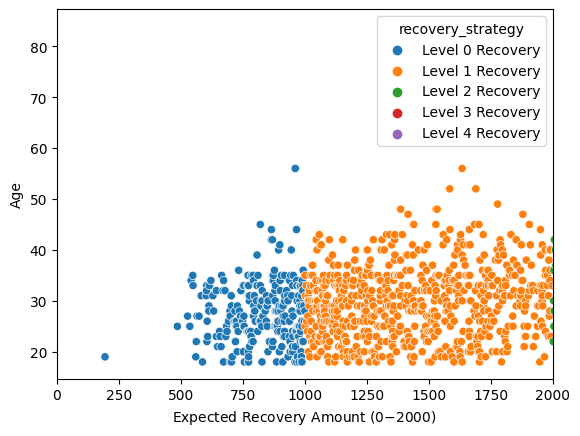

In [5]:
sns.scatterplot(data=df, x='expected_recovery_amount', y='age', hue='recovery_strategy')
plt.xlim(0, 2000)
plt.xlabel('Expected Recovery Amount (0$ - 2000$)')
plt.ylabel('Age')

## Adding Threshold Column & Create Datasets With Different ERA Ranges

In [6]:
# Adding thresholding-indicator column for reqgression
df['threshold_indicator'] = (df['expected_recovery_amount'] > 1000).astype(int)

In [7]:
# Create dataset with different ranges (900$ - 1100$) & (950$ - 1050$)
DF1 = df[(df['expected_recovery_amount'] > 900) & (df['expected_recovery_amount'] <= 1100)]
DF2 = df[(df['expected_recovery_amount'] > 950) & (df['expected_recovery_amount'] <= 1050)]

## Statistical test: age vs. expected recovery amount

In [8]:
avg_age = DF1.groupby('recovery_strategy')['age'].mean()
print(avg_age)

print(f"-"*35)

level0_age = DF1.loc[DF1['recovery_strategy'] == "Level 0 Recovery", 'age']
level1_age = DF1.loc[DF1['recovery_strategy'] == "Level 1 Recovery", 'age']
k_stat, p_value = stats.kruskal(level1_age, level0_age)
print("Kruskal-Wallis-statistic:", k_stat)
print("p-value:", p_value)

recovery_strategy
Level 0 Recovery    27.104651
Level 1 Recovery    28.684211
Name: age, dtype: float64
-----------------------------------
Kruskal-Wallis-statistic: 3.7424529880270625
p-value: 0.05304651575900465


## Statistical test: sex vs. expected recovery amount

In [9]:
crosstab = pd.crosstab(DF1['recovery_strategy'], DF1['sex'])
print(crosstab)
print("-"*35)

chi2_stat, p_val = stats.chisquare(crosstab)
print("Chi-square test statistic:", list(chi2_stat))
print("p-value:", list(p_val))

sex                Female  Male
recovery_strategy              
Level 0 Recovery       31    55
Level 1 Recovery       40    55
-----------------------------------
Chi-square test statistic: [1.1408450704225352, 0.0]
p-value: [0.285473830698583, 1.0]


## Exploratory graphical analysis: recovery amount

Text(0.5, 1.0, 'Actual Recovery Amount vs. Expected Recovery Amount')

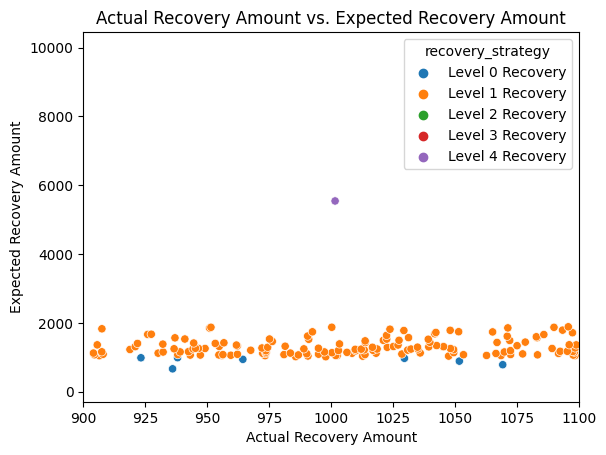

In [10]:
sns.scatterplot(data=df, x='actual_recovery_amount', y='expected_recovery_amount', hue='recovery_strategy')
plt.xlim(900, 1100)

plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')
plt.title('Actual Recovery Amount vs. Expected Recovery Amount')

## Statistical analysis: recovery amount

In [11]:
# 1st Window 900$-1000$
level0_ARA = DF1.loc[DF1['recovery_strategy'] == "Level 0 Recovery", 'actual_recovery_amount']
level1_age = DF1.loc[DF1['recovery_strategy'] == "Level 1 Recovery", 'actual_recovery_amount']
k_stat, p_value = stats.kruskal(level1_age, level0_age)
print("Kruskal-Wallis statistic:", k_stat)
print("p-value:", p_value)

print("-"*35)

# 2st Window 950$-1050$
level0_ARA = DF2.loc[DF2['recovery_strategy'] == "Level 0 Recovery", 'actual_recovery_amount']
level1_age = DF2.loc[DF2['recovery_strategy'] == "Level 1 Recovery", 'actual_recovery_amount']
k_stat, p_value = stats.kruskal(level1_age, level0_age)
print("Kruskal-Wallis-statistic:", k_stat)
print("p-value:", p_value)

Kruskal-Wallis statistic: 134.71272302517642
p-value: 3.815693814041952e-31
-----------------------------------
Kruskal-Wallis-statistic: 88.02761594127404
p-value: 6.454697410161847e-21


## Regression modeling: no threshold

In [12]:
import statsmodels.api as sm

In [13]:
X = DF1['expected_recovery_amount']
y = DF1['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.243
Model:                                OLS   Adj. R-squared:                  0.239
Method:                     Least Squares   F-statistic:                     57.61
Date:                    Fri, 21 Jul 2023   Prob (F-statistic):           1.69e-12
Time:                            06:05:25   Log-Likelihood:                -1267.0
No. Observations:                     181   AIC:                             2538.
Df Residuals:                         179   BIC:                             2544.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1933.7231    360.399     -5.366      0.000   -2644.900   -1222.546
expected_recovery_amount     2.7103      0.357      7.590      0.000       2.006       3.415
==============================================================================
Omnibus:                       62.769   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.365
Skew:                           1.448   Prob(JB):                     8.32e-39
Kurtosis:                       6.855   Cond. No.                     1.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression modeling: adding true threshold

In [14]:
X = DF1[['expected_recovery_amount', 'threshold_indicator']]
y = DF1['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.290
Model:                                OLS   Adj. R-squared:                  0.282
Method:                     Least Squares   F-statistic:                     36.35
Date:                    Fri, 21 Jul 2023   Prob (F-statistic):           5.77e-14
Time:                            06:05:25   Log-Likelihood:                -1261.2
No. Observations:                     181   AIC:                             2528.
Df Residuals:                         178   BIC:                             2538.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -36.3730    656.601     -0.055      0.956   -1332.096    1259.351
expected_recovery_amount     0.6920      0.685      1.010      0.314      -0.660       2.044
threshold_indicator        260.2396     76.187      3.416      0.001     109.893     410.586
==============================================================================
Omnibus:                       63.360   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.433
Skew:                           1.486   Prob(JB):                     1.61e-37
Kurtosis:                       6.692   Cond. No.                     3.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression modeling: adjusting the window

In [15]:
X = DF2[['expected_recovery_amount', 'threshold_indicator']]
y = DF2['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.275
Model:                                OLS   Adj. R-squared:                  0.259
Method:                     Least Squares   F-statistic:                     17.97
Date:                    Fri, 21 Jul 2023   Prob (F-statistic):           2.40e-07
Time:                            06:05:25   Log-Likelihood:                -686.95
No. Observations:                      98   AIC:                             1380.
Df Residuals:                          95   BIC:                             1388.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1462.0687   1915.296     -0.763      0.447   -5264.413    2340.275
expected_recovery_amount     2.1341      1.960      1.089      0.279      -1.757       6.025
threshold_indicator        215.9743    114.524      1.886      0.062     -11.384     443.333
==============================================================================
Omnibus:                       40.489   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.717
Skew:                           1.615   Prob(JB):                     1.48e-19
Kurtosis:                       6.287   Cond. No.                     6.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""